In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/AIVLE/AI SPARK 공모전/train_data.csv')

# test 데이터 불러오기
test = pd.read_csv('/content/drive/MyDrive/AIVLE/AI SPARK 공모전/test_data.csv')

# MinMaxScaler를 이용해 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# PCA 선언
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=2023)

#### 전체 데이터 pca 시각화 (train, test data)

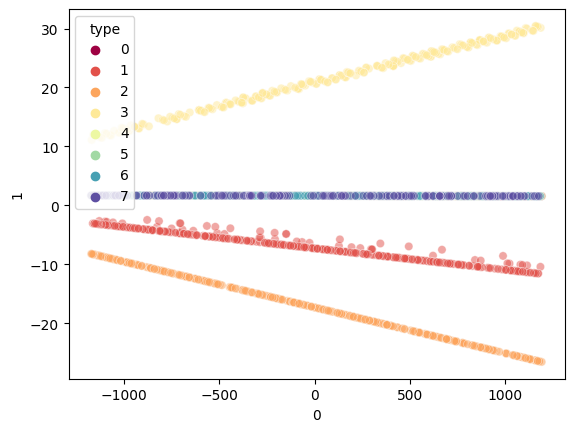

In [ ]:
# train data : scaling x, pca
train_pca = pca.fit_transform(train.drop(['out_pressure','type'], axis=1))
train_pca = pd.DataFrame(train_pca)
train_pca = pd.concat([train_pca, train['type']], axis=1)

sns.scatterplot(x=train_pca[0], y=train_pca[1], data=train_pca, hue='type', palette='Spectral', legend='full', alpha=0.5)
plt.show()

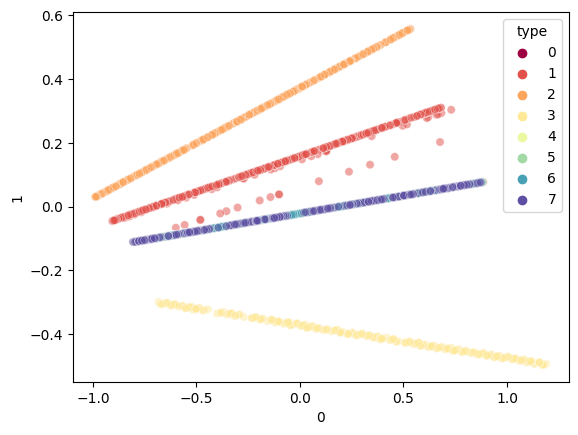

In [ ]:
# train data : scaling o, pca
train_scaled_pca = pca.fit_transform(scaler.fit_transform(train.drop(['out_pressure','type'], axis=1)))
train_scaled_pca = pd.DataFrame(train_scaled_pca)
train_scaled_pca = pd.concat([train_scaled_pca, train['type']], axis=1)

sns.scatterplot(x=train_scaled_pca[0], y=train_scaled_pca[1], data=train_scaled_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.show()

[]

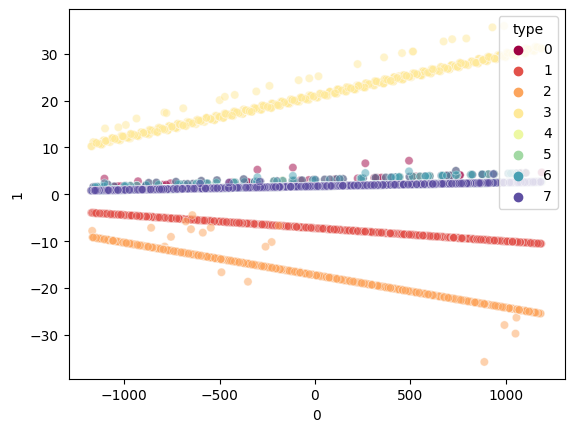

In [ ]:
# test data : scaling x, pca
test_pca = pca.fit_transform(test.drop(['out_pressure','type'], axis=1))
test_pca = pd.DataFrame(test_pca)
test_pca = pd.concat([test_pca, test['type']], axis=1)

sns.scatterplot(x=test_pca[0], y=test_pca[1], data=test_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.plot()

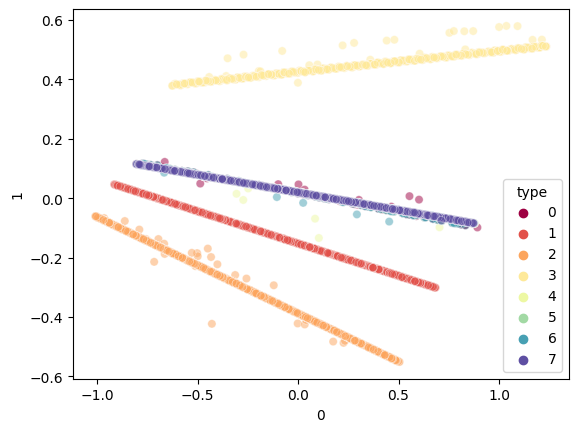

In [ ]:
# test data : scaling o, pca
test_scaled_pca = pca.fit_transform(scaler.fit_transform(test.drop(['out_pressure','type'], axis=1)))
test_scaled_pca = pd.DataFrame(test_scaled_pca)
test_scaled_pca = pd.concat([test_scaled_pca, test['type']], axis=1)

sns.scatterplot(x=test_scaled_pca[0], y=test_scaled_pca[1], data=test_scaled_pca, hue='type', palette='Spectral', alpha=0.5, legend='full')
plt.show()

#### test, train 합쳐서 pca 시각화
1. type 0, 1, 2, 3, 4, 5, 6, 7 모두 나눠서 시각화
2. 왼쪽은 scaling 미적용, 오른쪽은 scaling 적용
3. train 데이터에 linear regression 적용하여 일차방정식 생성
4. test 데이터와 비교하여 diff 차이가 많이 나면 이상치 판단

In [2]:
# 타입 별로 train data + test data
all0 = pd.concat([train[train['type']==0], test[test['type']==0]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)
all1 = pd.concat([train[train['type']==1], test[test['type']==1]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)
all2 = pd.concat([train[train['type']==2], test[test['type']==2]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)
all3 = pd.concat([train[train['type']==3], test[test['type']==3]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)
all4 = pd.concat([train[train['type']==4], test[test['type']==4]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)
all5 = pd.concat([train[train['type']==5], test[test['type']==5]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)
all6 = pd.concat([train[train['type']==6], test[test['type']==6]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)
all7 = pd.concat([train[train['type']==7], test[test['type']==7]], axis=0).reset_index(drop=True).drop(['out_pressure','type'], axis=1)

##### type 0

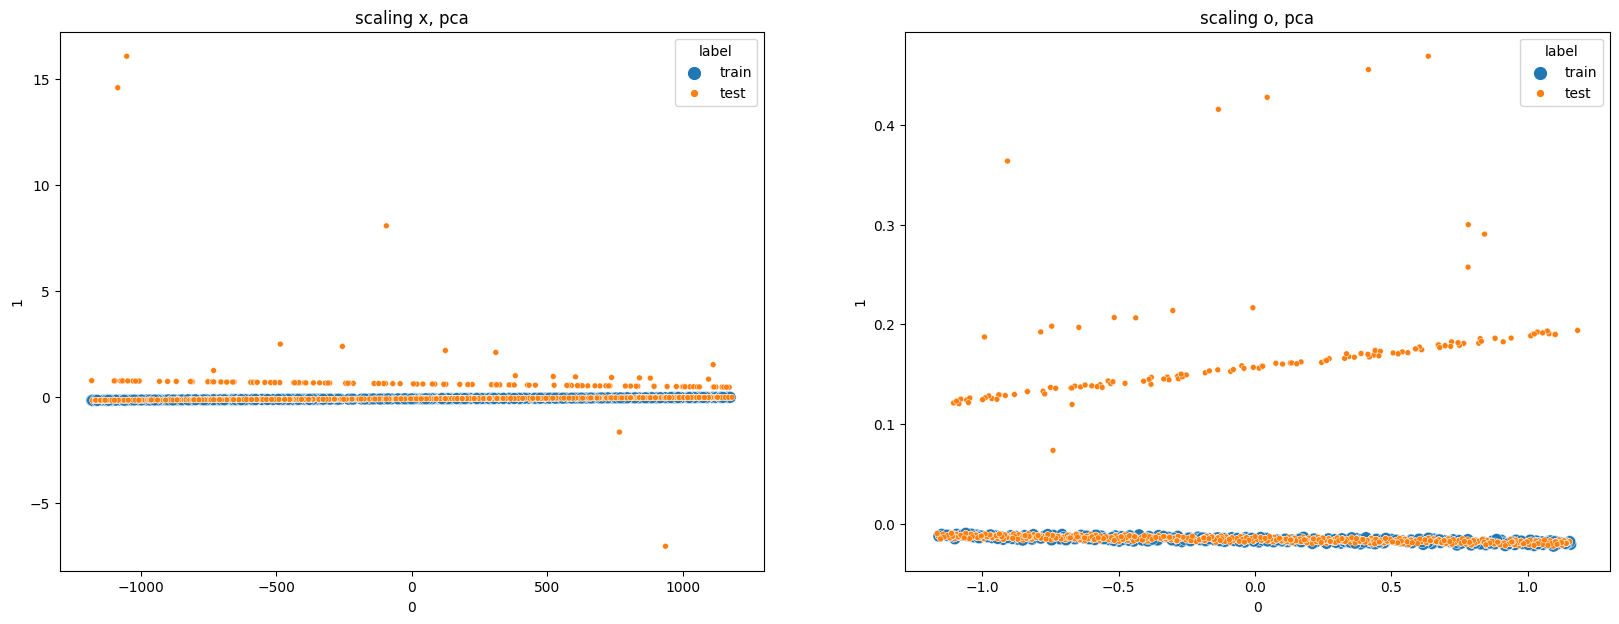

In [5]:
# all0 : pca(scaling x / scaling o)
all0_pca = pca.fit_transform(all0)
all0_pca = pd.DataFrame(all0_pca)
all0_pca['label'] = ['train'] * len(train[train['type']==0]) + ['test'] * len(test[test['type']==0])

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=all0_pca[0], y=all0_pca[1], data=all0_pca, hue='label', size='label')
plt.title('scaling x, pca')

all0_scaled_pca = pca.fit_transform(scaler.fit_transform(all0))
all0_scaled_pca = pd.DataFrame(all0_scaled_pca)
all0_scaled_pca['label'] = ['train'] * len(train[train['type']==0]) + ['test'] * len(test[test['type']==0])

plt.subplot(1,2,2)
sns.scatterplot(x=all0_scaled_pca[0], y=all0_scaled_pca[1], data=all0_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [6]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train0_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==0].drop(['out_pressure','type'], axis=1))))
test0_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==0].drop(['out_pressure','type'], axis=1))))

reg0 = LinearRegression()
reg0.fit(train0_scaled_pca[0].values.reshape(-1,1), train0_scaled_pca[1])

test0_scaled_pca['diff'] = abs(reg0.coef_ * test0_scaled_pca[0] + reg0.intercept_ - test0_scaled_pca[1])

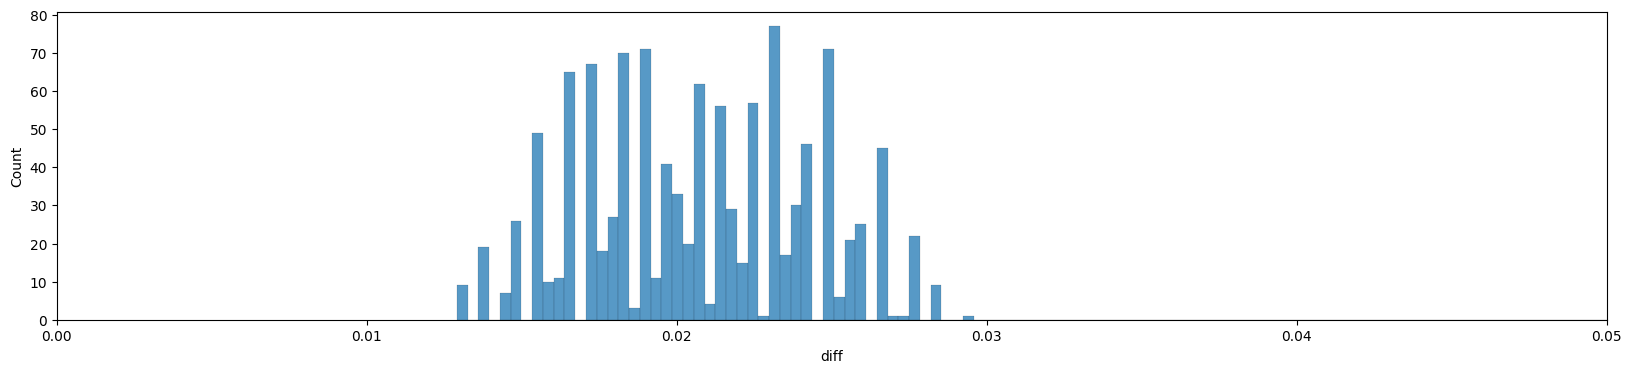

In [7]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test0_scaled_pca, bins=len(test0_scaled_pca))
plt.xlim([0,0.05])
plt.show() # 0.05 이상이면 이상치

In [8]:
# 이상치 판단
test0_scaled_pca['label'] = np.where(test0_scaled_pca['diff'] > 0.05, 1, 0)
test0_scaled_pca['label'].value_counts()

0    1153
1     143
Name: label, dtype: int64

##### type 1

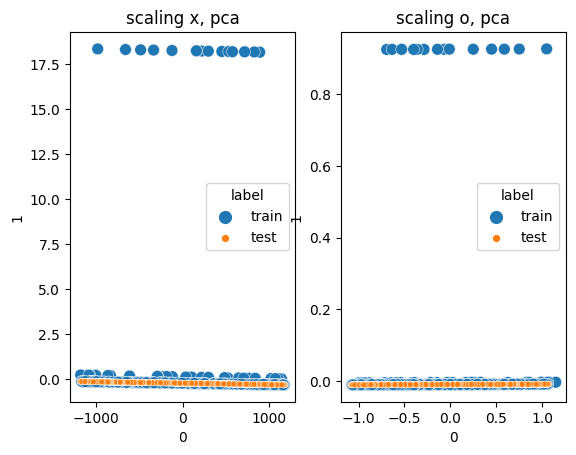

In [ ]:
# all1 : pca(scaling x / scaling o)
all1_pca = pca.fit_transform(all1)
all1_pca = pd.DataFrame(all1_pca)
all1_pca['label'] = ['train'] * len(train[train['type']==1]) + ['test'] * len(test[test['type']==1])

plt.subplot(1,2,1)
sns.scatterplot(x=all1_pca[0], y=all1_pca[1], data=all1_pca, hue='label', size='label')
plt.title('scaling x, pca')

all1_scaled_pca = pca.fit_transform(scaler.fit_transform(all1))
all1_scaled_pca = pd.DataFrame(all1_scaled_pca)
all1_scaled_pca['label'] = ['train'] * len(train[train['type']==1]) + ['test'] * len(test[test['type']==1])

plt.subplot(1,2,2)
sns.scatterplot(x=all1_scaled_pca[0], y=all1_scaled_pca[1], data=all1_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# type 1은 일단 다 정상 판단

train1_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==1].drop(['out_pressure','type'], axis=1))))
test1_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==1].drop(['out_pressure','type'], axis=1))))

test1_scaled_pca['label'] = 0
test1_scaled_pca['label'].value_counts()

0    1107
Name: label, dtype: int64

##### type 2

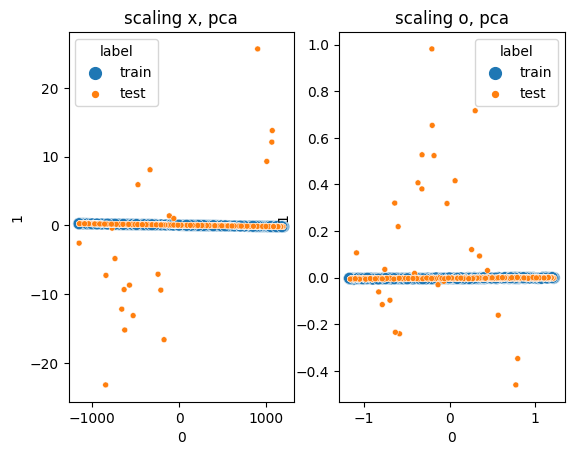

In [ ]:
# all2 : pca(scaling x / scaling o)
all2_pca = pca.fit_transform(all2)
all2_pca = pd.DataFrame(all2_pca)
all2_pca['label'] = ['train'] * len(train[train['type']==2]) + ['test'] * len(test[test['type']==2])

plt.subplot(1,2,1)
sns.scatterplot(x=all2_pca[0], y=all2_pca[1], data=all2_pca, hue='label', size='label')
plt.title('scaling x, pca')

all2_scaled_pca = pca.fit_transform(scaler.fit_transform(all2))
all2_scaled_pca = pd.DataFrame(all2_scaled_pca)
all2_scaled_pca['label'] = ['train'] * len(train[train['type']==2]) + ['test'] * len(test[test['type']==2])

plt.subplot(1,2,2)
sns.scatterplot(x=all2_scaled_pca[0], y=all2_scaled_pca[1], data=all2_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train2_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==2].drop(['out_pressure','type'], axis=1))))
test2_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==2].drop(['out_pressure','type'], axis=1))))

reg2 = LinearRegression()
reg2.fit(train2_scaled_pca[0].values.reshape(-1,1), train2_scaled_pca[1])

test2_scaled_pca['diff'] = abs(reg2.coef_ * test2_scaled_pca[0] + reg2.intercept_ - test2_scaled_pca[1])

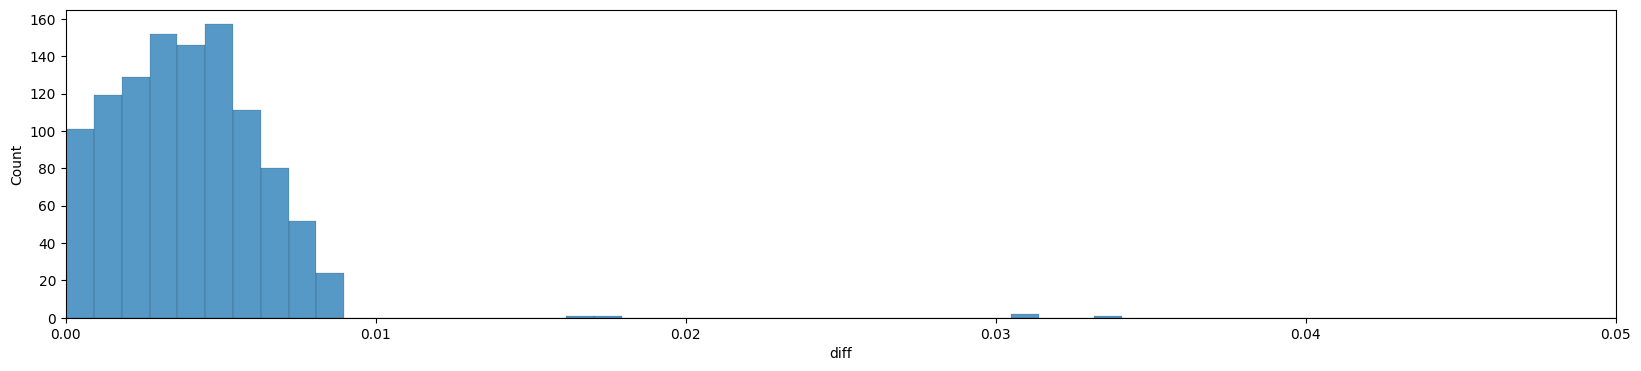

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test2_scaled_pca, bins=len(test2_scaled_pca))
plt.xlim([0,0.05])
plt.show() # 0.01 이상이면 이상치

In [ ]:
# 이상치 판단
test2_scaled_pca['label'] = np.where(test2_scaled_pca['diff'] > 0.01, 1, 0)
test2_scaled_pca['label'].value_counts()

0    1071
1      27
Name: label, dtype: int64

##### type 3

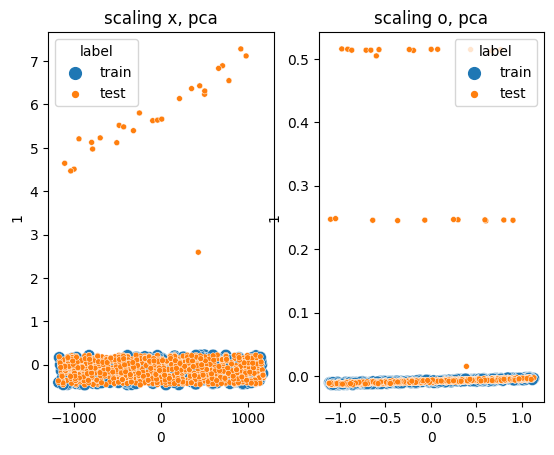

In [ ]:
# all3 : pca(scaling x / scaling o)
all3_pca = pca.fit_transform(all3)
all3_pca = pd.DataFrame(all3_pca)
all3_pca['label'] = ['train'] * len(train[train['type']==3]) + ['test'] * len(test[test['type']==3])

plt.subplot(1,2,1)
sns.scatterplot(x=all3_pca[0], y=all3_pca[1], data=all3_pca, hue='label', size='label')
plt.title('scaling x, pca')

all3_scaled_pca = pca.fit_transform(scaler.fit_transform(all3))
all3_scaled_pca = pd.DataFrame(all3_scaled_pca)
all3_scaled_pca['label'] = ['train'] * len(train[train['type']==3]) + ['test'] * len(test[test['type']==3])

plt.subplot(1,2,2)
sns.scatterplot(x=all3_scaled_pca[0], y=all3_scaled_pca[1], data=all3_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train3_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==3].drop(['out_pressure','type'], axis=1))))
test3_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==3].drop(['out_pressure','type'], axis=1))))

reg3 = LinearRegression()
reg3.fit(train3_scaled_pca[0].values.reshape(-1,1), train3_scaled_pca[1])

test3_scaled_pca['diff'] = abs(reg3.coef_ * test3_scaled_pca[0] + reg3.intercept_ - test3_scaled_pca[1])

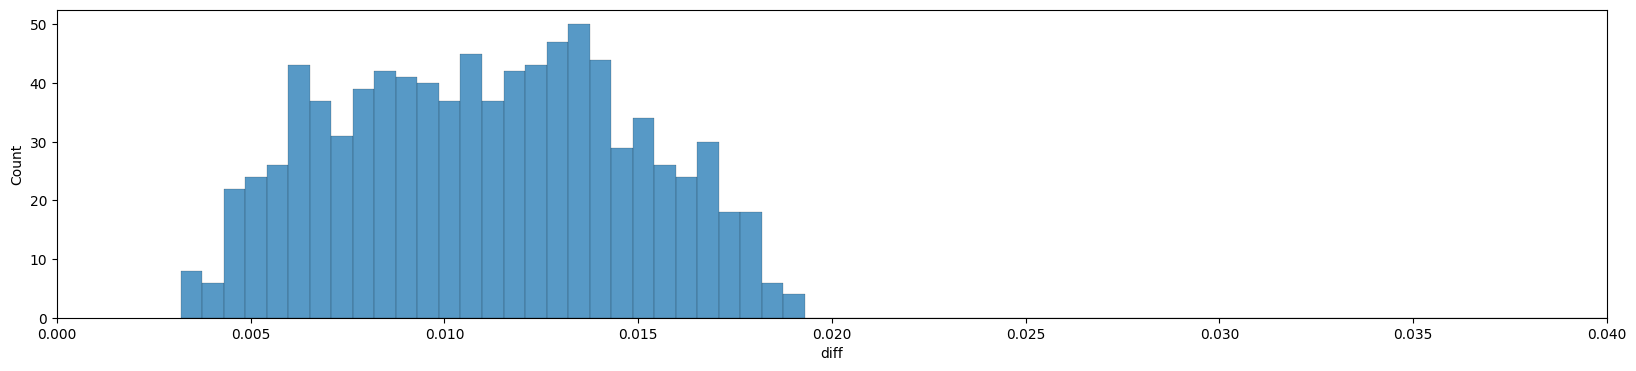

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test3_scaled_pca, bins=len(test3_scaled_pca))
plt.xlim([0,0.04])
plt.show() # 0.02 이상이면 이상치

In [ ]:
# 이상치 판단
test3_scaled_pca['label'] = np.where(test3_scaled_pca['diff'] > 0.02, 1, 0)
test3_scaled_pca['label'].value_counts()

0    893
1     25
Name: label, dtype: int64

##### type 4

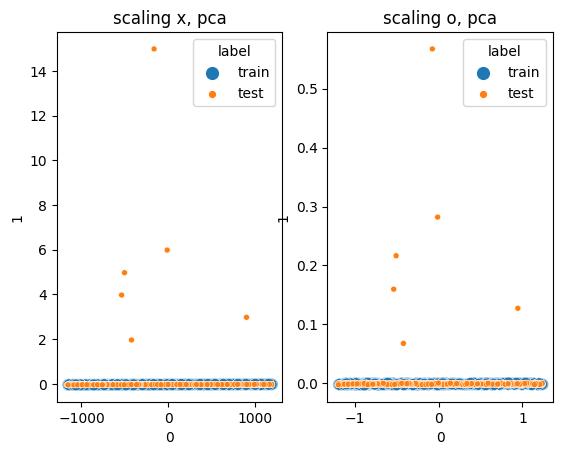

In [ ]:
# all4 : pca(scaling x / scaling o)
all4_pca = pca.fit_transform(all4)
all4_pca = pd.DataFrame(all4_pca)
all4_pca['label'] = ['train'] * len(train[train['type']==4]) + ['test'] * len(test[test['type']==4])

plt.subplot(1,2,1)
sns.scatterplot(x=all4_pca[0], y=all4_pca[1], data=all4_pca, hue='label', size='label')
plt.title('scaling x, pca')

all4_scaled_pca = pca.fit_transform(scaler.fit_transform(all4))
all4_scaled_pca = pd.DataFrame(all4_scaled_pca)
all4_scaled_pca['label'] = ['train'] * len(train[train['type']==4]) + ['test'] * len(test[test['type']==4])

plt.subplot(1,2,2)
sns.scatterplot(x=all4_scaled_pca[0], y=all4_scaled_pca[1], data=all4_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train4_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==4].drop(['out_pressure','type'], axis=1))))
test4_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==4].drop(['out_pressure','type'], axis=1))))

reg4 = LinearRegression()
reg4.fit(train4_scaled_pca[0].values.reshape(-1,1), train4_scaled_pca[1])

test4_scaled_pca['diff'] = abs(reg4.coef_ * test4_scaled_pca[0] + reg4.intercept_ - test4_scaled_pca[1])

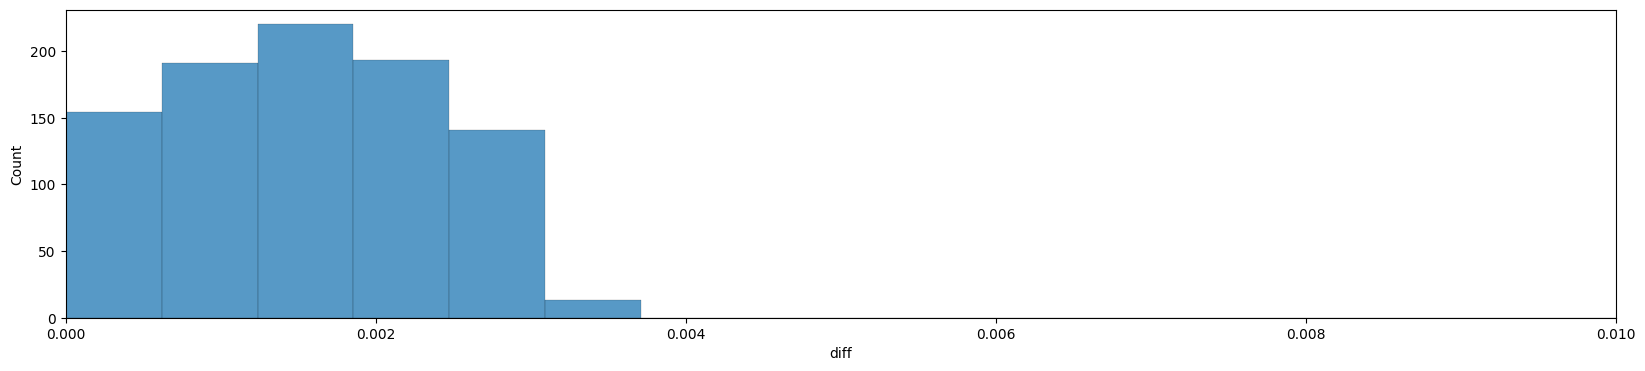

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test4_scaled_pca, bins=len(test4_scaled_pca))
plt.xlim([0,0.01])
plt.show() # 0.01 이상이면 이상치

In [ ]:
# 이상치 판단
test4_scaled_pca['label'] = np.where(test4_scaled_pca['diff'] > 0.01, 1, 0)
test4_scaled_pca['label'].value_counts()

0    912
1      6
Name: label, dtype: int64

##### type 5

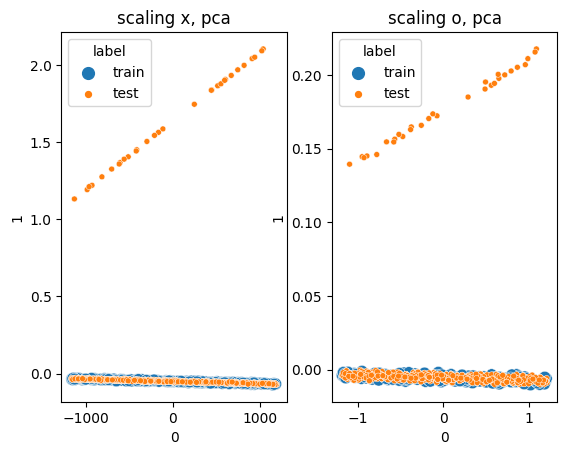

In [ ]:
# all5 : pca(scaling x / scaling o)
all5_pca = pca.fit_transform(all5)
all5_pca = pd.DataFrame(all5_pca)
all5_pca['label'] = ['train'] * len(train[train['type']==5]) + ['test'] * len(test[test['type']==5])

plt.subplot(1,2,1)
sns.scatterplot(x=all5_pca[0], y=all5_pca[1], data=all5_pca, hue='label', size='label')
plt.title('scaling x, pca')

all5_scaled_pca = pca.fit_transform(scaler.fit_transform(all5))
all5_scaled_pca = pd.DataFrame(all5_scaled_pca)
all5_scaled_pca['label'] = ['train'] * len(train[train['type']==5]) + ['test'] * len(test[test['type']==5])

plt.subplot(1,2,2)
sns.scatterplot(x=all5_scaled_pca[0], y=all5_scaled_pca[1], data=all5_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train5_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==5].drop(['out_pressure','type'], axis=1))))
test5_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==5].drop(['out_pressure','type'], axis=1))))

reg5 = LinearRegression()
reg5.fit(train5_scaled_pca[0].values.reshape(-1,1), train5_scaled_pca[1])

test5_scaled_pca['diff'] = abs(reg5.coef_ * test5_scaled_pca[0] + reg5.intercept_ - test5_scaled_pca[1])

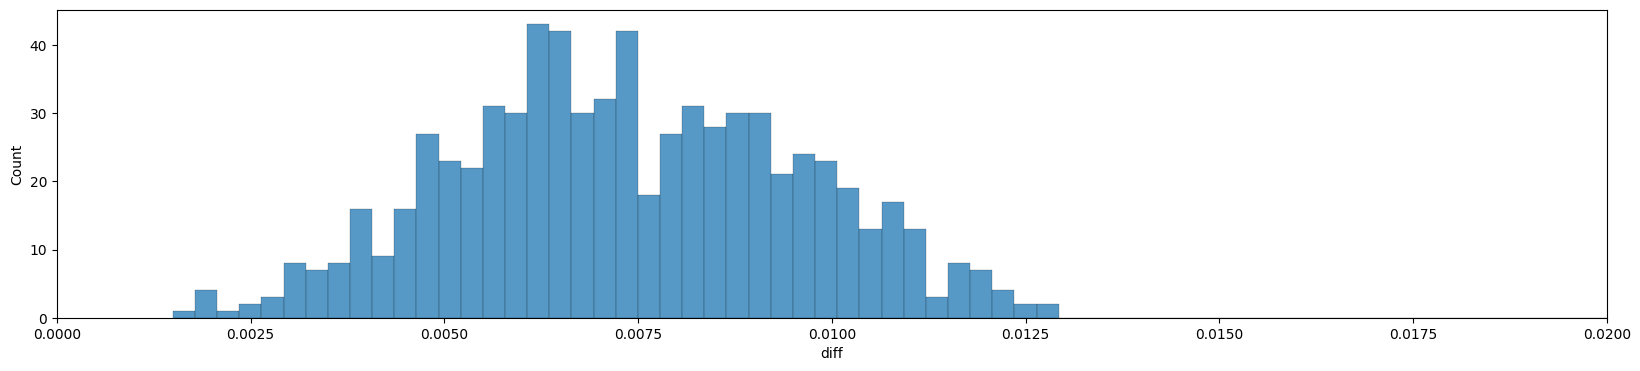

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test5_scaled_pca, bins=len(test5_scaled_pca))
plt.xlim([0,0.02])
plt.show() # 0.02 이상이면 이상치

In [ ]:
# 이상치 판단
test5_scaled_pca['label'] = np.where(test5_scaled_pca['diff'] > 0.02, 1, 0)
test5_scaled_pca['label'].value_counts()

0    717
1     30
Name: label, dtype: int64

##### type 6

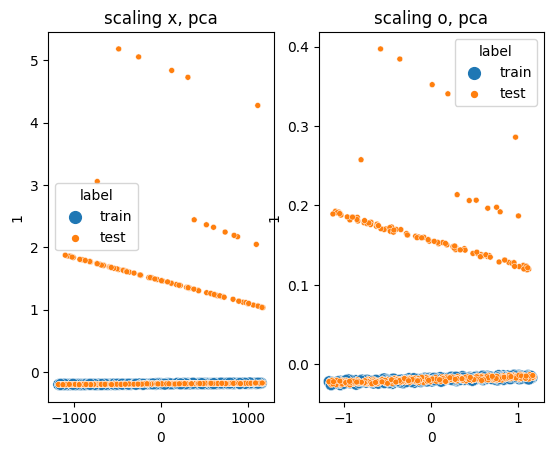

In [ ]:
# all6 : pca(scaling x / scaling o)
all6_pca = pca.fit_transform(all6)
all6_pca = pd.DataFrame(all6_pca)
all6_pca['label'] = ['train'] * len(train[train['type']==6]) + ['test'] * len(test[test['type']==6])

plt.subplot(1,2,1)
sns.scatterplot(x=all6_pca[0], y=all6_pca[1], data=all6_pca, hue='label', size='label')
plt.title('scaling x, pca')

all6_scaled_pca = pca.fit_transform(scaler.fit_transform(all6))
all6_scaled_pca = pd.DataFrame(all6_scaled_pca)
all6_scaled_pca['label'] = ['train'] * len(train[train['type']==6]) + ['test'] * len(test[test['type']==6])

plt.subplot(1,2,2)
sns.scatterplot(x=all6_scaled_pca[0], y=all6_scaled_pca[1], data=all6_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling x
from sklearn.linear_model import LinearRegression

train6_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==6].drop(['out_pressure','type'], axis=1))))
test6_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==6].drop(['out_pressure','type'], axis=1))))

reg6 = LinearRegression()
reg6.fit(train6_scaled_pca[0].values.reshape(-1,1), train6_scaled_pca[1])

test6_scaled_pca['diff'] = abs(reg6.coef_ * test6_scaled_pca[0] + reg6.intercept_ - test6_scaled_pca[1])

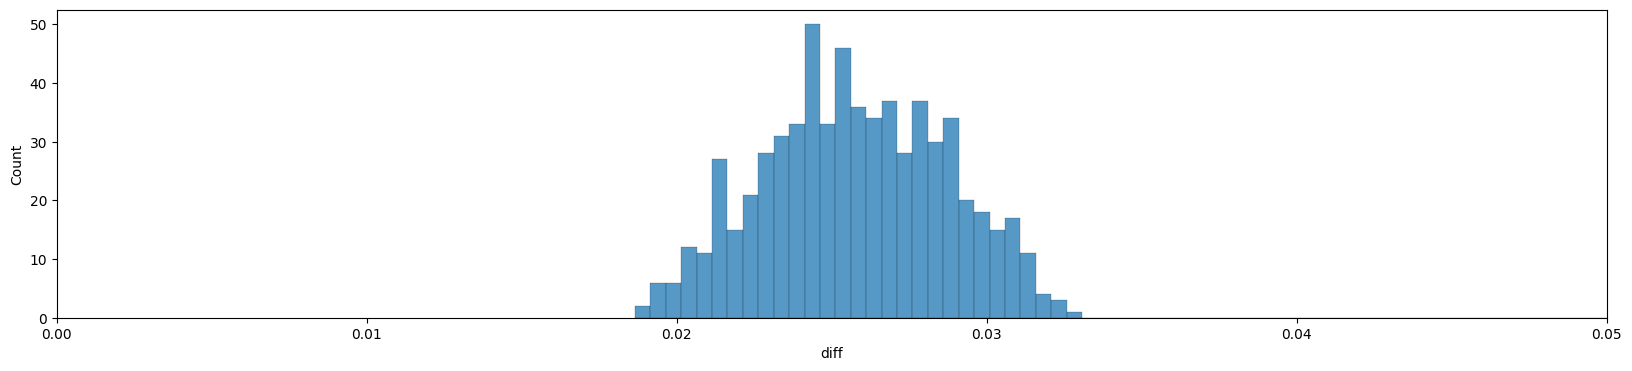

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test6_scaled_pca, bins=len(test6_scaled_pca))
plt.xlim([0,0.05])
plt.show() # 0.05 이상이면 이상치

In [ ]:
# 이상치 판단
test6_scaled_pca['label'] = np.where(test6_scaled_pca['diff'] > 0.05, 1, 0)
test6_scaled_pca['label'].value_counts()

0    646
1    101
Name: label, dtype: int64

##### type 7

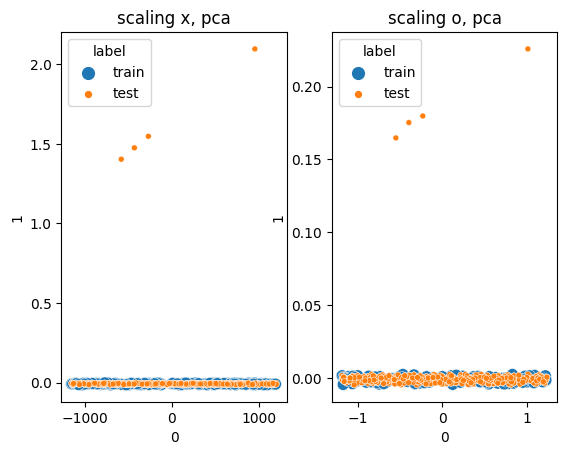

In [ ]:
# all7 : pca(scaling x / scaling o)
all7_pca = pca.fit_transform(all7)
all7_pca = pd.DataFrame(all7_pca)
all7_pca['label'] = ['train'] * len(train[train['type']==7]) + ['test'] * len(test[test['type']==7])

plt.subplot(1,2,1)
sns.scatterplot(x=all7_pca[0], y=all7_pca[1], data=all7_pca, hue='label', size='label')
plt.title('scaling x, pca')

all7_scaled_pca = pca.fit_transform(scaler.fit_transform(all7))
all7_scaled_pca = pd.DataFrame(all7_scaled_pca)
all7_scaled_pca['label'] = ['train'] * len(train[train['type']==7]) + ['test'] * len(test[test['type']==7])

plt.subplot(1,2,2)
sns.scatterplot(x=all7_scaled_pca[0], y=all7_scaled_pca[1], data=all7_scaled_pca, hue='label', size='label')
plt.title('scaling o, pca')
plt.show()

In [ ]:
# 선형회귀 방정식 구하기 : 방정식에 대입했을 때 차이가 많이 나면 이상치
# scaling o
from sklearn.linear_model import LinearRegression

train7_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(train[train['type']==7].drop(['out_pressure','type'], axis=1))))
test7_scaled_pca = pd.DataFrame(pca.fit_transform(scaler.fit_transform(test[test['type']==7].drop(['out_pressure','type'], axis=1))))

reg7 = LinearRegression()
reg7.fit(train7_scaled_pca[0].values.reshape(-1,1), train7_scaled_pca[1])

test7_scaled_pca['diff'] = abs(reg7.coef_ * test7_scaled_pca[0] + reg7.intercept_ - test7_scaled_pca[1])

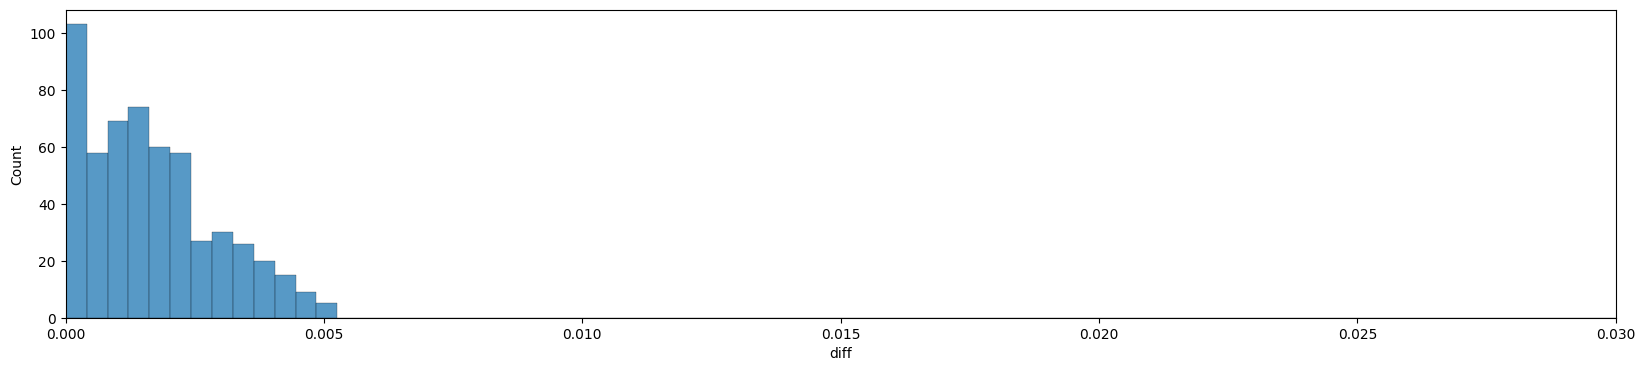

In [ ]:
# diff 분포 확인
plt.figure(figsize=(20,4))
sns.histplot(x='diff', data=test7_scaled_pca, bins=len(test7_scaled_pca))
plt.xlim([0,0.03])
plt.show() # 0.01 이상이면 이상치

In [ ]:
# 이상치 판단
test7_scaled_pca['label'] = np.where(test7_scaled_pca['diff'] > 0.01, 1, 0)
test7_scaled_pca['label'].value_counts()

0    554
1      4
Name: label, dtype: int64

##### answer file

In [ ]:
answer = pd.concat([test0_scaled_pca['label'], test1_scaled_pca['label'], test2_scaled_pca['label'], test3_scaled_pca['label'], test4_scaled_pca['label'],
                    test5_scaled_pca['label'], test6_scaled_pca['label'], test7_scaled_pca['label']]).reset_index(drop=True)
answer.to_csv('answer.csv')

In [ ]:
sum(answer == 1)

336

In [ ]:
len(answer)

7389